In [2]:
import numpy as np
import scipy.stats as stats
import pymc3 as pm
np.random.seed(123)
trials = 4
theta_real = 0.35
data=stats.bernoulli.rvs(p=theta_real,size=trials)
print(data)

[1 0 0 0]


In [3]:
with pm.Model() as first_model:
    theta = pm.Beta('theta',alpha=1.0, beta=1.0)
    y = pm.Bernoulli('y',p=theta,observed=data)
    trace=pm.sample(1000,random_seed=44)


/var/folders/4d/q427n_f576n48f63r9jty87r0000gn/T/ipykernel_31510/3173730785.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace=pm.sample(1000,random_seed=44)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.


/Users/dougchang/miniconda3/envs/cosmic/lib/python3.9/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>]], dtype=object)

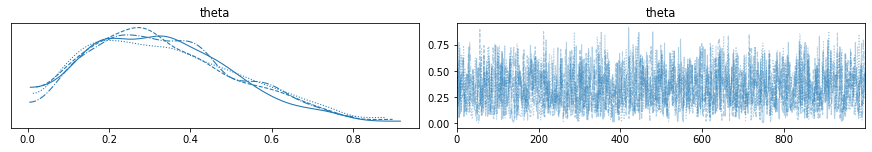

In [8]:
import arviz as az
az.plot_trace(trace)


In [9]:
az.summary(trace)

/Users/dougchang/miniconda3/envs/cosmic/lib/python3.9/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta,0.335,0.179,0.035,0.663,0.004,0.003,1824.0,1824.0,1737.0,2168.0,1.0


/Users/dougchang/miniconda3/envs/cosmic/lib/python3.9/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'theta'}>

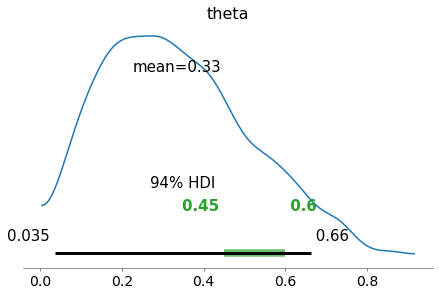

In [12]:
az.plot_posterior(trace,rope=[0.45,.6])

/Users/dougchang/miniconda3/envs/cosmic/lib/python3.9/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'theta'}>

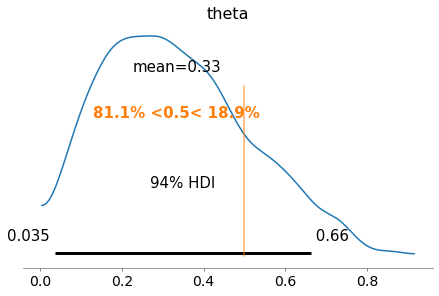

In [13]:
az.plot_posterior(trace, ref_val=0.5)

